# Regresión Logística Múltiple

**Tenga en cuenta que este script es una guía para ayudar en la resolución de los ejercicios. Las consignas, incisos, datasets, tablas, parámetros y/o demás valores utilizados pueden no coincidir con los de la práctica.**

---
**Montar la carpeta de Google Drive y definir constantes para trabajar**

In [1]:
MNT_DRIVE_DIR = '/content/drive/'
DRIVE_DIR = '/content/drive/MyDrive/'
DATOS_DIR = DRIVE_DIR + 'Colab Notebooks/Datos/'
FUENTES_DIR = DRIVE_DIR + 'Colab Notebooks/Fuentes/'

from google.colab import drive
drive.mount(MNT_DRIVE_DIR)

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

Mounted at /content/drive/


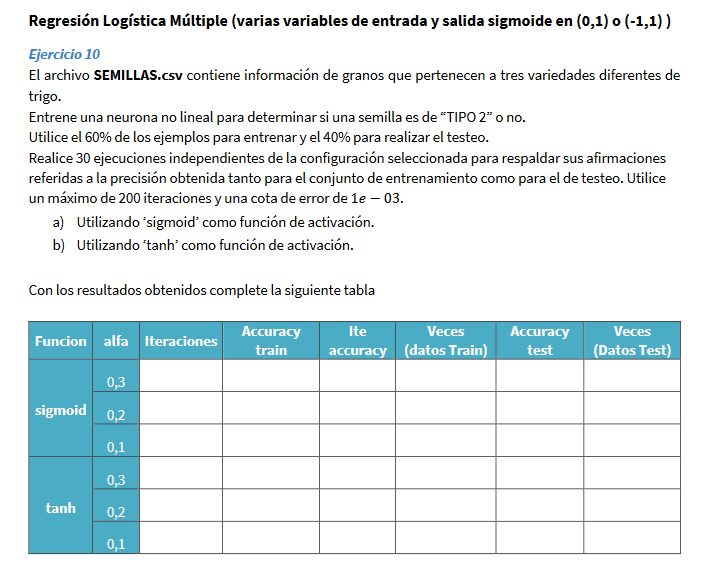

In [7]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np
# from google.colab import data_table

from sklearn import preprocessing, model_selection
from matplotlib import pyplot as plt

# importa neurona lineal de Laura en la carpeta Colab definida con FUENTES_DIR
from ClassNeuronaGral import NeuronaGradiente


# data_table.enable_dataframe_formatter()

def open_file(path):
    # open the path with automatic encoding
    with open(path, 'rb') as file:
        encoding = chardet.detect(file.read())
    
    return pd.read_csv(path, encoding=encoding['encoding'])

df = open_file("../Datos/Semillas.csv")
df


,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Tipo1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Tipo1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Tipo1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Tipo1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Tipo1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,Tipo3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,Tipo3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,Tipo3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,Tipo3


Selección de atributos y normalización

In [8]:

X_raw = np.array(df.iloc[:,0:-1])  # recupera todas las columnas salvo la última (es la clase)
T_raw = np.array(df.iloc[:,-1])    # recupera solo la última columna (es la clase)

clases = np.unique(T_raw)  # obtiene las clases sin repeticiones
print('Las clases del dataset son :', clases)

# Normalizacion con media y desviacion
scaler = preprocessing.StandardScaler()
# scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X_raw)

Las clases del dataset son : ['Tipo1' 'Tipo2' 'Tipo3']


Entrenamiento de modelos para cada una de las clases

In [66]:
###############################################################################
# neurona no lineal sigmoid
ERROR = 1e-03
ALFA = 0.1
FUN = 'sigmoid'
MAX_ITE = 200

print('\nNeurona con %s' %FUN)


# hace entrenamiento por cada clase
for cls_name in clases:
    # Establece resultado esperado según la clase. 1=clase esperada, 0=otra clase

    T = 1 * (T_raw == cls_name) ### T TOMA LOS VALORES POR CADA CLASE
    # Entrena perceptrón
    modelo = NeuronaGradiente(alpha=ALFA, n_iter=MAX_ITE, FUN=FUN, cotaE=ERROR)
    modelo.fit(X, T)
    (W, b, iteraciones) = (modelo.w_, modelo.b_, len(modelo.errors_))
    
    Y = modelo.predict(X) 
    ### T --> LO QUE DEBERIA PREDECIR
    ### Y --> LO QUE SE PREDIJO
    
    efectividad = 100.0*np.sum(Y==T)/len(Y)

    print("Clase %s con %6.2f%% de efectividad con %d iteraciones" % (cls_name, efectividad, iteraciones ))




Neurona con sigmoid
Clase Tipo1 con  93.81% de efectividad con 200 iteraciones
Clase Tipo2 con  98.10% de efectividad con 200 iteraciones
Clase Tipo3 con  97.14% de efectividad con 200 iteraciones


Entrenamiento para clases del "Tipo 2"

In [28]:
TABLA = [["Funcion", "alfa", "Iteraciones","Accuracy train", "Ite accuracy "]]

# neurona no lineal sigmoid
ERROR = 1e-03
ALFA = 0.3
FUN = 'sigmoid'
MAX_ITE = 200
CORRIDAS = 30
TEST_SIZE = .4

print('\nNeurona con %s' %FUN)

# hace entrenamiento por cada clase
cls_name = 'Tipo2'
prom_ite = 0
prom_acc_train = 0
prom_acc_test = 0
veces_train = 0
veces_test = 0

T = 1*(T_raw==cls_name)

for nro_ite in range(CORRIDAS):
    # Establece resultado esperado según la clase. 1=clase esperada, 0=otra clase

    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, T, test_size=TEST_SIZE)#, random_state=42)
    # Entrena perceptrón
    modelo = NeuronaGradiente(alpha=ALFA, n_iter=MAX_ITE, FUN=FUN, cotaE=ERROR)
    modelo.fit(X_train, Y_train)

    (W, b, iteraciones) = (modelo.w_, modelo.b_, len(modelo.errors_))

    prom_ite = prom_ite + iteraciones

    # efectividad entrenamiento
    Y_pred = modelo.predict(X_train)
    efectividad = 100.0*np.sum(Y_train==Y_pred)/len(Y_pred)
    prom_acc_train = prom_acc_train + efectividad
    if (100-efectividad>0.0000001):
        veces_train = veces_train + 1

    # efectividad entrenamiento
    Y_pred = modelo.predict(X_test)
    efectividad = 100.0*np.sum(Y_test==Y_pred)/len(Y_pred)
    prom_acc_test = prom_acc_test + efectividad
    if (100-efectividad>0.0000001):
      veces_test = veces_test + 1

    print("Clase %s con %6.2f%% de efectividad con %d iteraciones" % (cls_name, efectividad, iteraciones ))

print('promedio iteraciones  : %6.2f' % (prom_ite/CORRIDAS))
print('promedio acc. train   : %6.2f' % (prom_acc_train/CORRIDAS))
print('promedio acc. test    : %6.2f' % (prom_acc_test/CORRIDAS))
print('ejec. train con 100%%  : %3d' % (veces_train))
print('ejec.  test con 100%%  : %3d' % (veces_test))


Neurona con sigmoid
Clase Tipo2 con  97.62% de efectividad con 200 iteraciones
Clase Tipo2 con 100.00% de efectividad con 200 iteraciones
Clase Tipo2 con  98.81% de efectividad con 200 iteraciones
Clase Tipo2 con  96.43% de efectividad con 200 iteraciones
Clase Tipo2 con  96.43% de efectividad con 125 iteraciones
Clase Tipo2 con  98.81% de efectividad con 200 iteraciones
Clase Tipo2 con  98.81% de efectividad con 200 iteraciones
Clase Tipo2 con  97.62% de efectividad con 174 iteraciones
Clase Tipo2 con  95.24% de efectividad con 200 iteraciones
Clase Tipo2 con  91.67% de efectividad con 142 iteraciones
Clase Tipo2 con  96.43% de efectividad con 200 iteraciones
Clase Tipo2 con  98.81% de efectividad con 200 iteraciones
Clase Tipo2 con  97.62% de efectividad con 200 iteraciones
Clase Tipo2 con  97.62% de efectividad con 200 iteraciones
Clase Tipo2 con  92.86% de efectividad con 159 iteraciones
Clase Tipo2 con  94.05% de efectividad con 200 iteraciones
Clase Tipo2 con  98.81% de efectivi

In [27]:
###############################################################################
# neurona no lineal tanh
ERROR = 1e-03
ALFA = 0.3
FUN = 'tanh'
MAX_ITE = 200
CORRIDAS = 30
TEST_SIZE = .4

print('\nNeurona con %s' %FUN)

cls_name = 'Tipo2'
prom_ite = 0
prom_acc_train = 0
prom_acc_test = 0
veces_train = 0
veces_test = 0

T = 2*(T_raw==cls_name)-1

for nro_ite in range(CORRIDAS):
    # Establece resultado esperado según la clase. 1=clase esperada, 0=otra clase

    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, T, test_size=TEST_SIZE)#, random_state=42)
    # Entrena perceptrón
    modelo = NeuronaGradiente(alpha=ALFA, n_iter=MAX_ITE, FUN=FUN, cotaE=ERROR)
    modelo.fit(X_train, Y_train)

    (W, b, iteraciones) = (modelo.w_, modelo.b_, len(modelo.errors_))

    prom_ite = prom_ite + iteraciones

    # efectividad entrenamiento
    Y_pred = modelo.predict(X_train)
    efectividad = 100.0*np.sum(Y_train==Y_pred)/len(Y_pred)
    prom_acc_train = prom_acc_train + efectividad
    if (100-efectividad>0.0000001):
      veces_train = veces_train + 1

    # efectividad entrenamiento
    Y_pred = modelo.predict(X_test)
    efectividad = 100.0*np.sum(Y_test==Y_pred)/len(Y_pred)
    prom_acc_test = prom_acc_test + efectividad
    if (100-efectividad>0.0000001):
      veces_test = veces_test + 1

    print("Clase %s con %6.2f%% de efectividad con %d iteraciones" % (cls_name, efectividad, iteraciones ))

print('promedio iteraciones  : %6.2f' % (prom_ite/CORRIDAS))
print('promedio acc. train   : %6.2f' % (prom_acc_train/CORRIDAS))
print('promedio acc. test    : %6.2f' % (prom_acc_test/CORRIDAS))
print('ejec. train con 100%%  : %3d' % (veces_train))
print('ejec.  test con 100%%  : %3d' % (veces_test))


Neurona con tanh
Clase Tipo2 con  97.62% de efectividad con 200 iteraciones
Clase Tipo2 con  97.62% de efectividad con 15 iteraciones
Clase Tipo2 con  96.43% de efectividad con 57 iteraciones
Clase Tipo2 con  97.62% de efectividad con 200 iteraciones
Clase Tipo2 con  98.81% de efectividad con 200 iteraciones
Clase Tipo2 con  97.62% de efectividad con 200 iteraciones
Clase Tipo2 con  97.62% de efectividad con 125 iteraciones
Clase Tipo2 con  96.43% de efectividad con 200 iteraciones
Clase Tipo2 con  98.81% de efectividad con 200 iteraciones
Clase Tipo2 con  95.24% de efectividad con 110 iteraciones
Clase Tipo2 con  98.81% de efectividad con 200 iteraciones
Clase Tipo2 con  96.43% de efectividad con 200 iteraciones
Clase Tipo2 con  95.24% de efectividad con 173 iteraciones
Clase Tipo2 con  97.62% de efectividad con 129 iteraciones
Clase Tipo2 con  97.62% de efectividad con 47 iteraciones
Clase Tipo2 con  98.81% de efectividad con 200 iteraciones
Clase Tipo2 con  98.81% de efectividad co